<a href="https://colab.research.google.com/github/Durgasai26/Customer_Segmention/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('new.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
for col in df.columns:
	temp = df[col].isnull().sum()
	if temp > 0:
		print(f'Column {col} contains {temp} null values.')

Column Income contains 24 null values.


In [ ]:
df = df.dropna()
print("Total missing values are:", len(df))

Total missing values are: 2216


In [ ]:
df.nunique()

,0
ID,2216
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,662
Recency,100
MntWines,776


In [ ]:
parts = df["Dt_Customer"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')

In [ ]:
df.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer'],
		axis=1,
		inplace=True)

In [ ]:
floats, objects = [], []
for col in df.columns:
	if df[col].dtype == object:
		objects.append(col)
	elif df[col].dtype == float:
		floats.append(col)

print(objects)
print(floats)

['Education', 'Marital_Status']
['Income']


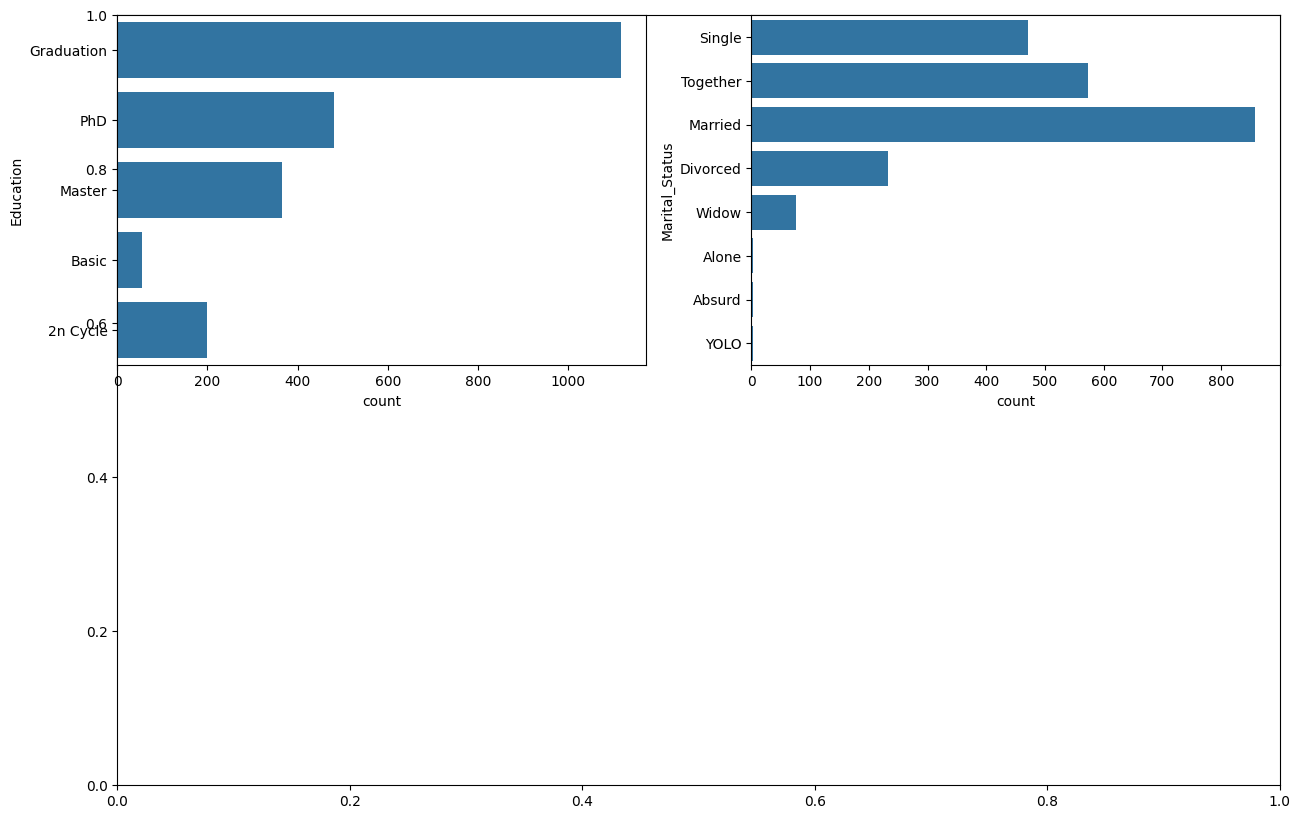

In [ ]:
plt.subplots(figsize=(15, 10))
for i, col in enumerate(objects):
	plt.subplot(2, 2, i + 1)
	sb.countplot(df[col])
plt.show()

In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


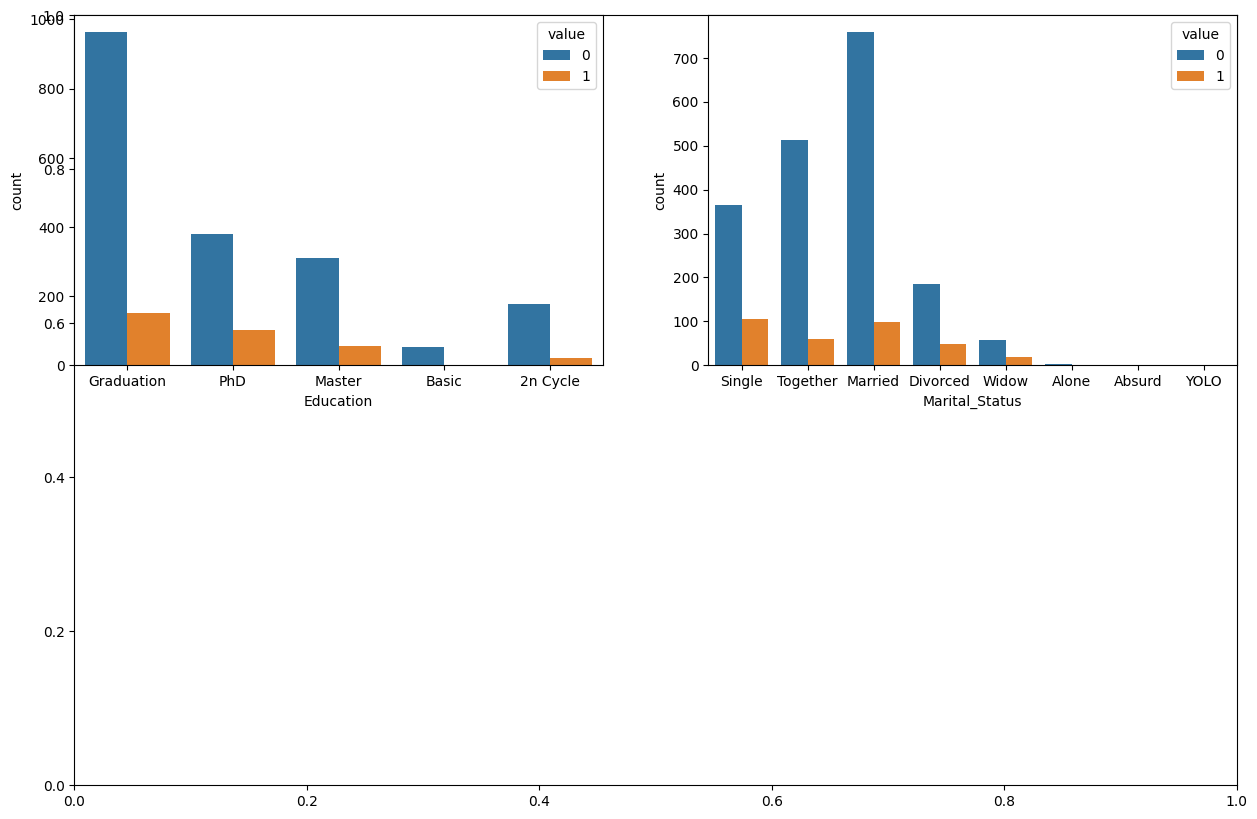

In [ ]:
plt.subplots(figsize=(15, 10))
for i, col in enumerate(objects):
    plt.subplot(2, 2, i + 1)
    # Use melt to transform the data to long form
    df_melted = df.melt(id_vars=[col], value_vars=['Response'], var_name='hue')
    sb.countplot(x=col, hue='value', data=df_melted)
plt.show()

In [ ]:
for col in df.columns:
	if df[col].dtype == object:
		le = LabelEncoder()
		df[col] = le.fit_transform(df[col])

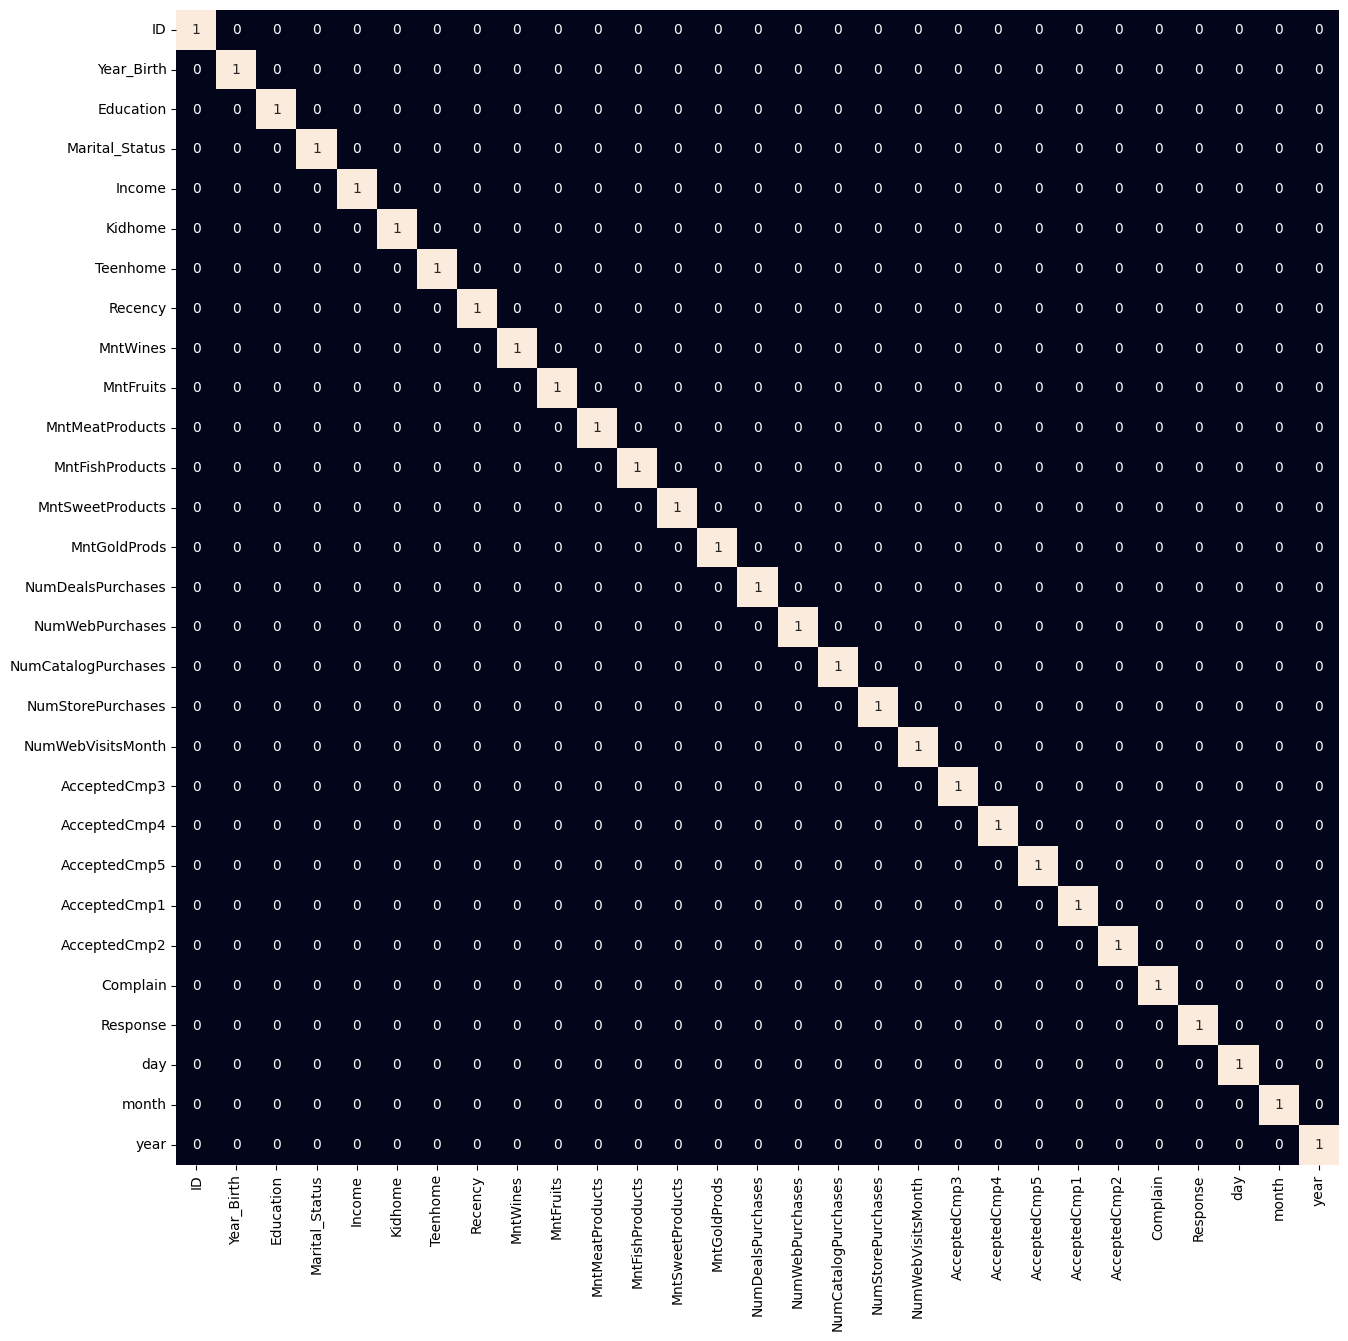

In [ ]:
plt.figure(figsize=(15, 15))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [ ]:
scaler = StandardScaler()
data = scaler.fit_transform(df)

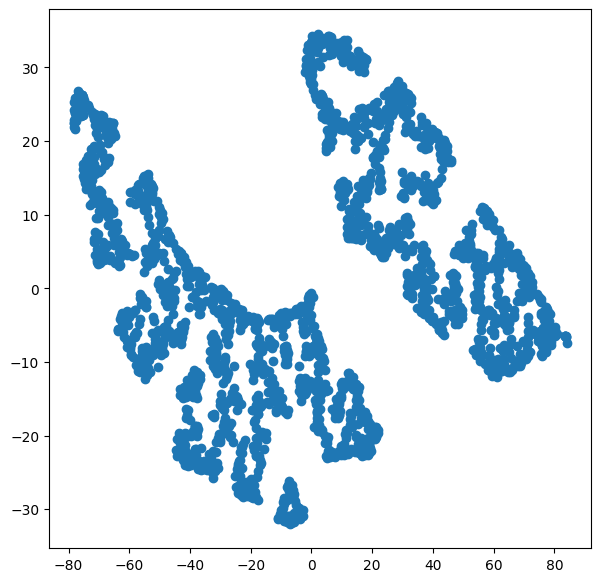

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(df)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [ ]:
error = []
for n_clusters in range(1, 21):
	model = KMeans(init='k-means++',
				n_clusters=n_clusters,
				max_iter=500,
				random_state=22)
	model.fit(df)
	error.append(model.inertia_)

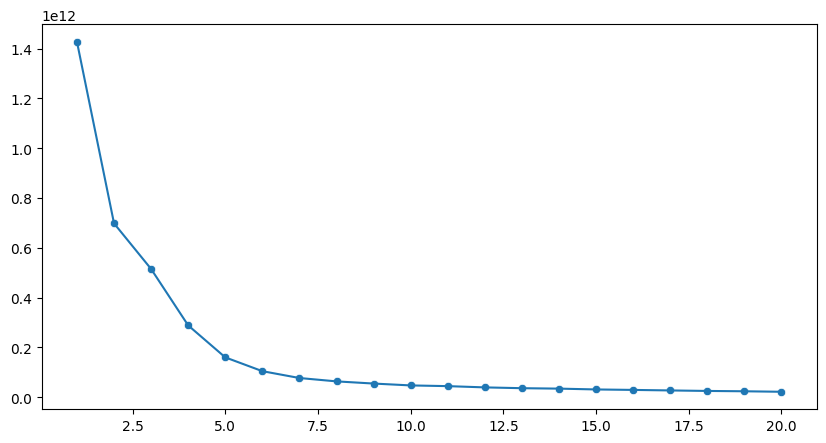

In [ ]:
plt.figure(figsize=(10, 5))
sb.lineplot(x=range(1, 21), y=error)
sb.scatterplot(x=range(1, 21), y=error)
plt.show()

In [ ]:
# create clustering model with optimal k=5
model = KMeans(init='k-means++',
			n_clusters=5,
			max_iter=500,
			random_state=22)
segments = model.fit_predict(df)

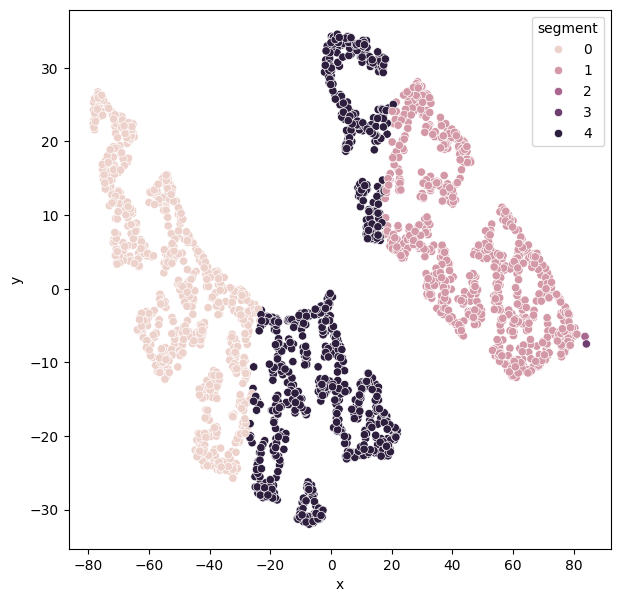

In [ ]:
plt.figure(figsize=(7, 7))
# Create a DataFrame with the tsne_data and segments
df_tsne = pd.DataFrame({'x': tsne_data[:, 0], 'y': tsne_data[:, 1], 'segment': segments})
# Use the DataFrame in the scatterplot function
sb.scatterplot(x='x', y='y', hue='segment', data=df_tsne)
plt.show()

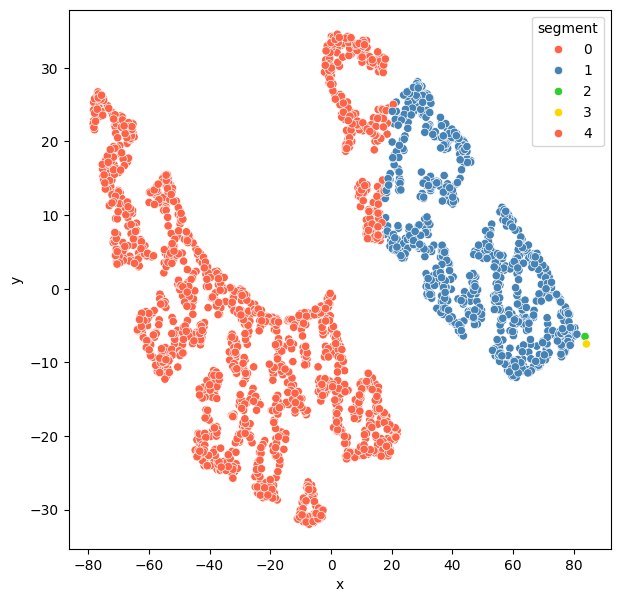

In [ ]:
plt.figure(figsize=(7, 7))

# Create a DataFrame with the tsne_data and segments
df_tsne = pd.DataFrame({'x': tsne_data[:, 0], 'y': tsne_data[:, 1], 'segment': segments})

# Use a custom palette for coloring
custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']  # Example of custom colors

# Create the scatter plot with the custom colors
sb.scatterplot(x='x', y='y', hue='segment', data=df_tsne, palette=custom_palette)

plt.show()

Data Shape: (2240, 29)
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumD

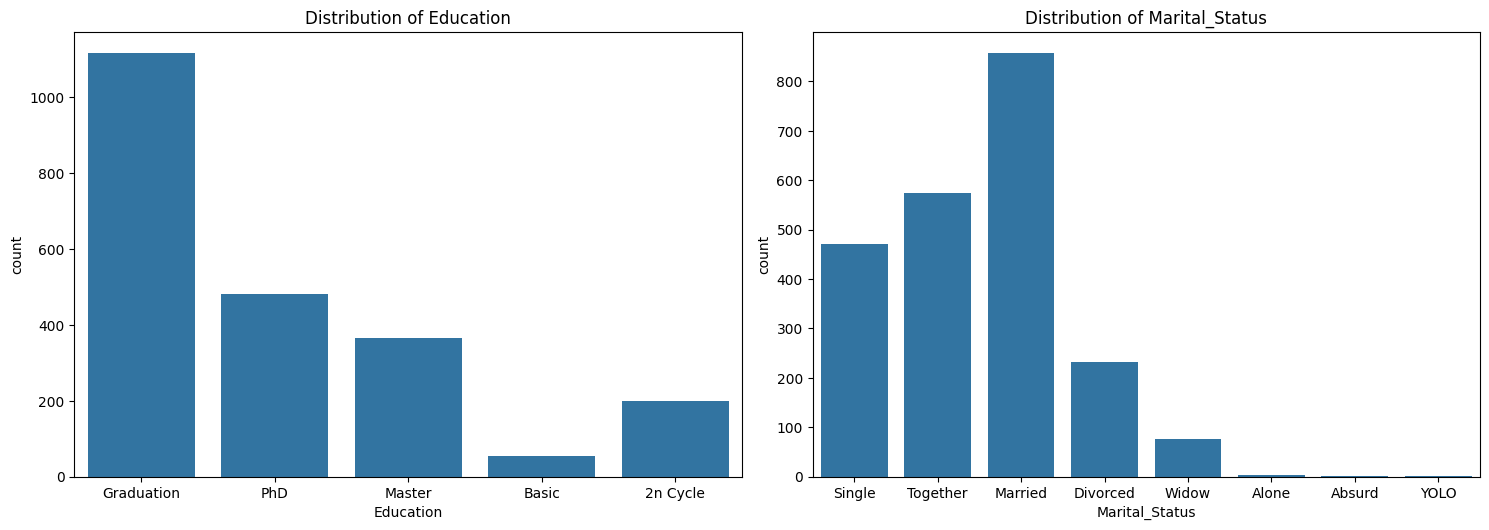

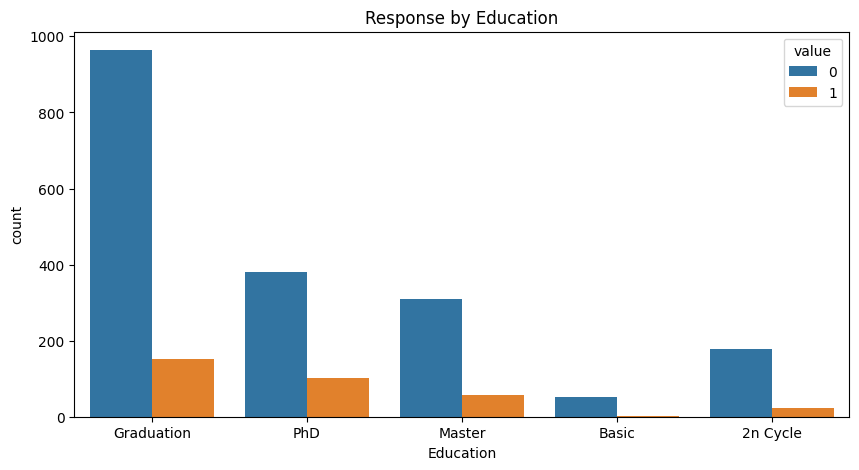

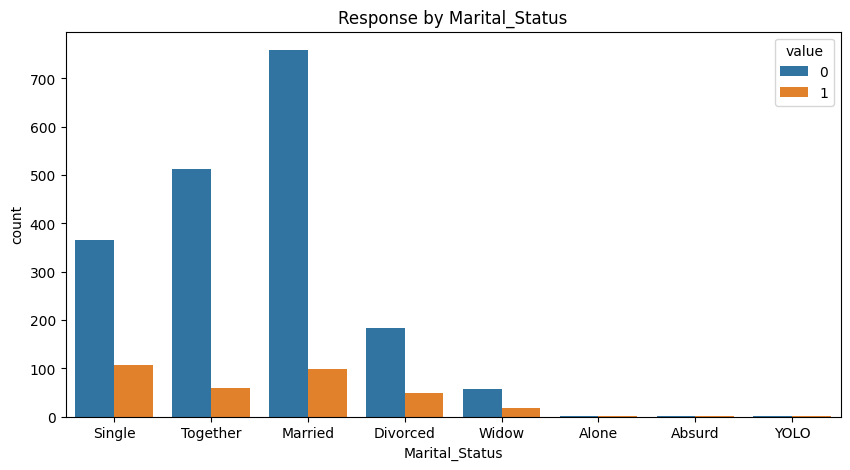

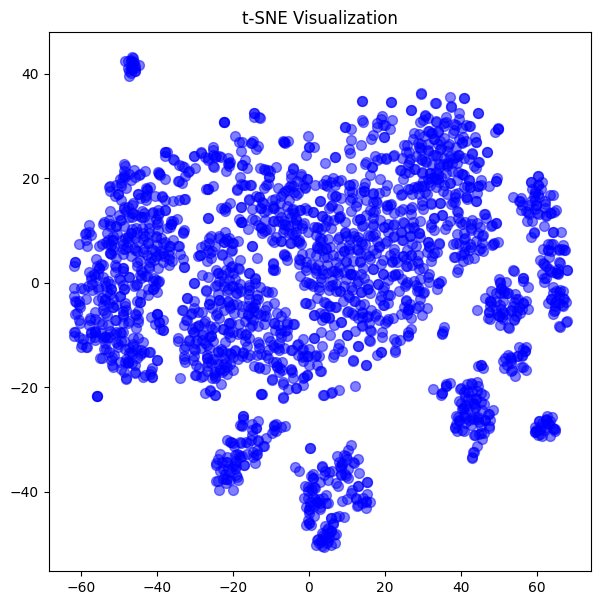

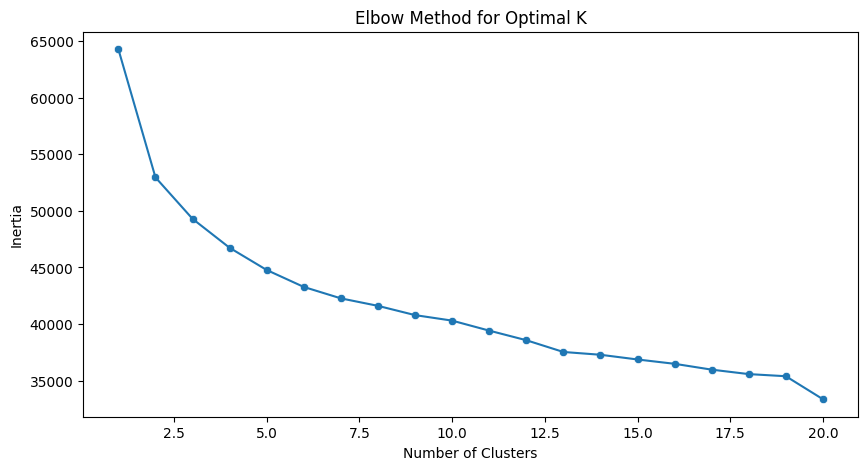

Silhouette Score for k=5: 0.13708653788323089


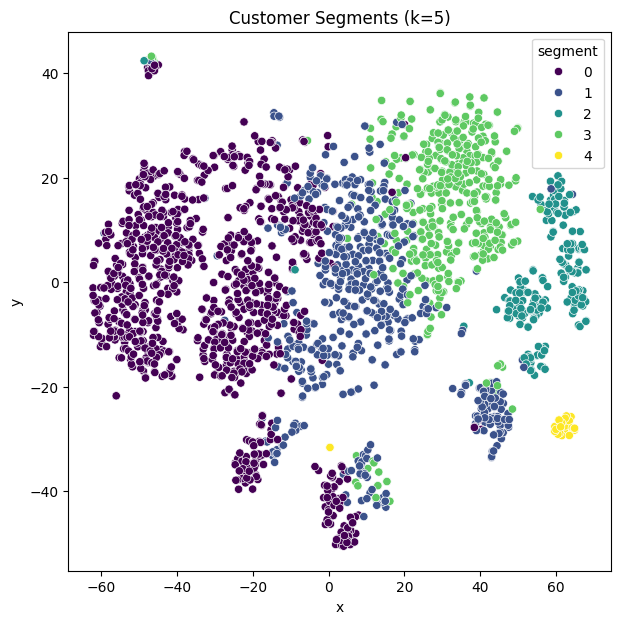

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings('ignore')

# Load and inspect the data
df = pd.read_csv('new.csv')
print("Data Shape:", df.shape)
print("Data Info:")
df.info()
print("Descriptive Statistics:")
print(df.describe().T)

# Handle missing values
df = df.dropna()  # Drop rows with missing values
print(f"Total missing values after cleaning: {df.isnull().sum().sum()}")

# Feature Engineering: Split 'Dt_Customer' into day, month, and year
parts = df["Dt_Customer"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')

# Drop unnecessary columns
df.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer'], axis=1, inplace=True)

# Visualize categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sb.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Visualize how categorical columns relate to 'Response'
for col in categorical_cols:
    df_melted = df.melt(id_vars=[col], value_vars=['Response'], var_name='hue')
    plt.figure(figsize=(10, 5))
    sb.countplot(x=col, hue='value', data=df_melted)
    plt.title(f'Response by {col}')
    plt.show()

# Label encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Dimensionality Reduction using t-SNE
model_tsne = TSNE(n_components=2, random_state=0)
tsne_data = model_tsne.fit_transform(scaled_data)

plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c='blue', s=50, alpha=0.5)
plt.title('t-SNE Visualization')
plt.show()

# Elbow method to determine the optimal number of clusters (k)
error = []
for n_clusters in range(1, 21):
    model = KMeans(init='k-means++', n_clusters=n_clusters, max_iter=500, random_state=22)
    model.fit(scaled_data)
    error.append(model.inertia_)

plt.figure(figsize=(10, 5))
sb.lineplot(x=range(1, 21), y=error)
sb.scatterplot(x=range(1, 21), y=error)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters (based on elbow method, let's assume k=5)
optimal_k = 5
model_kmeans = KMeans(init='k-means++', n_clusters=optimal_k, max_iter=500, random_state=22)
clusters = model_kmeans.fit_predict(scaled_data)

# Evaluate the clustering performance using Silhouette Score
silhouette = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score for k={optimal_k}: {silhouette}')

# Visualize the clustering result using t-SNE
df_tsne = pd.DataFrame({'x': tsne_data[:, 0], 'y': tsne_data[:, 1], 'segment': clusters})
plt.figure(figsize=(7, 7))
sb.scatterplot(x='x', y='y', hue='segment', data=df_tsne, palette="viridis")
plt.title(f'Customer Segments (k={optimal_k})')
plt.show()


Silhouette Score for k=2: 0.20523305286608853
Silhouette Score for k=3: 0.13594655570329994
Silhouette Score for k=4: 0.1364560762808989
Silhouette Score for k=5: 0.12816295540962966
Silhouette Score for k=6: 0.07332066653511443
Silhouette Score for k=7: 0.07106639543762588
Silhouette Score for k=8: 0.07484571355470174
Silhouette Score for k=9: 0.06541124311491314
Silhouette Score for k=10: 0.056927919902792515


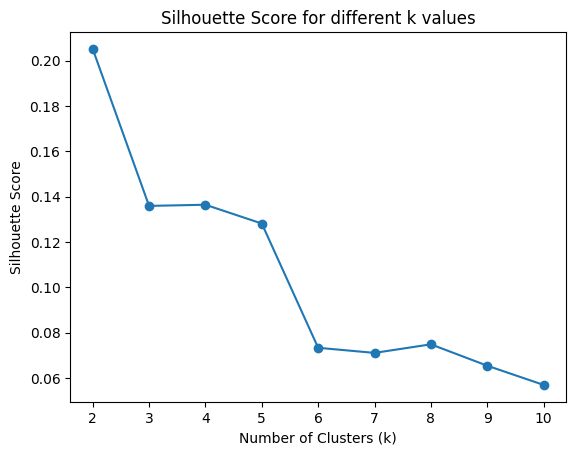

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 11):  # Try values from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)  # X is your dataset
    score = silhouette_score(scaled_data, clusters)
    scores.append(score)
    print(f"Silhouette Score for k={k}: {score}")

# Plot the silhouette scores for different k values
plt.plot(range(2, 11), scores, marker='o')
plt.title('Silhouette Score for different k values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()
